# 1 Introdução

 - Neste notebook, exploraremos técnicas de discretização para variáveis numéricas.
 - As técnicas abordadas serão:
 - Equal Width Binning
 - Equal Frequency Binning
 - K-Means Clustering

# 2 Importação das Bibliotecas

In [18]:
# Importamos as bibliotecas necessárias para manipulação dos dados e criação dos gráficos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 3 Carregamento do Dataset

## 3.1 Descrição do dataset

Para este exemplo, utilizaremos o dataset "Wine Quality" disponível no UCI Machine Learning Repository. Este dataset contém informações sobre a qualidade de vinhos tintos da região do Douro, em Portugal, com base em diversas características químicas. É amplamente utilizado em estudos de machine learning para predição e classificação da qualidade do vinho.

- Principais Características do Dataset:
    - fixed acidity: Acidez fixa do vinho.
    - volatile acidity: Acidez volátil do vinho.
    - citric acid: Conteúdo de ácido cítrico no vinho.
    - residual sugar: Açúcar residual no vinho.
    - chlorides: Concentração de cloretos no vinho.
    - free sulfur dioxide: Quantidade de dióxido de enxofre livre no vinho.
    - total sulfur dioxide: Quantidade total de dióxido de enxofre no vinho.
    - density: Densidade do vinho.
    - pH: pH do vinho.
    - sulphates: Concentração de sulfatos no vinho.
    - alcohol: Percentual de álcool no vinho.
    - quality: Qualidade do vinho (variável alvo), avaliada em uma escala de 0 a 10.

- Importância das Variáveis:
    - Acidez Fixa e Volátil: Afetam o sabor do vinho. Altos níveis de acidez volátil podem ser indesejáveis.
    - Ácido Cítrico: Contribui para a frescura e sabor do vinho.
    - Açúcar Residual: Impacta o sabor doce do vinho; níveis mais altos podem indicar um vinho doce.
    - Cloretos: Níveis de sal no vinho; altos níveis podem indicar defeitos.
    - Dióxido de Enxofre Livre e Total: Usado como conservante; protege contra oxidação e bactérias.
    - Densidade: Relacionada ao conteúdo de açúcar e álcool.
    - pH: Mede a acidez; influenciado pela acidez fixa e volátil.
    - Sulfatos: Contribuem para a estabilidade microbiológica e frescura.
    - Álcool: Contribui para o corpo e sabor do vinho.
    - Qualidade: Avaliação sensorial do vinho pelos provadores, sendo a variável alvo.

- Fonte do Dataset
    - O dataset está originalmente disponível em: Wine Quality Data Set no UCI Machine Learning Repository
    - Para carregar o dataset em um DataFrame do pandas:

        import pandas as pd

        url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

        df = pd.read_csv(url, delimiter=';')

In [19]:
df = pd.read_csv("datasets/wine-quality-red.csv")

# Visualizamos as primeiras linhas do dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 4 Análise Exploratória Inicial

In [20]:
# Visualizando informações gerais sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [21]:
# Vamos observar algumas estatísticas descritivas do dataset para entender melhor os dados.
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# 5 Equal Width Binning

A técnica de Equal Width Binning divide os dados em intervalos de largura igual.

## 5.1 Aplicação de Equal Width Binning

In [22]:
# Vamos discretizar a variável 'alcohol' em 5 bins de largura igual.
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
df['alcohol_equal_width'] = est.fit_transform(df[['alcohol']])

## 5.2 Visualização dos resultados

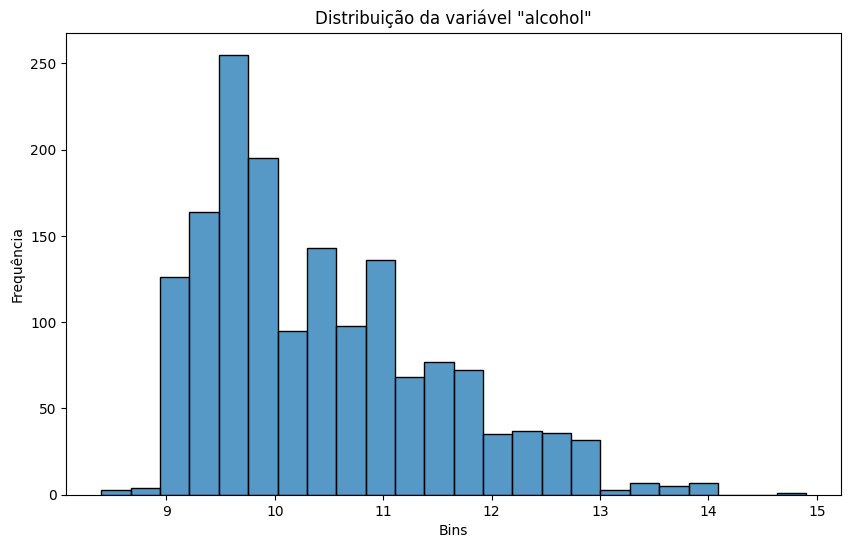

In [23]:
# Plotando a distribuição dos dados não discretizados
plt.figure(figsize=(10, 6))
sns.histplot(df['alcohol'], kde=False)
plt.title('Distribuição da variável "alcohol"')
plt.xlabel('Bins')
plt.ylabel('Frequência')
plt.show()

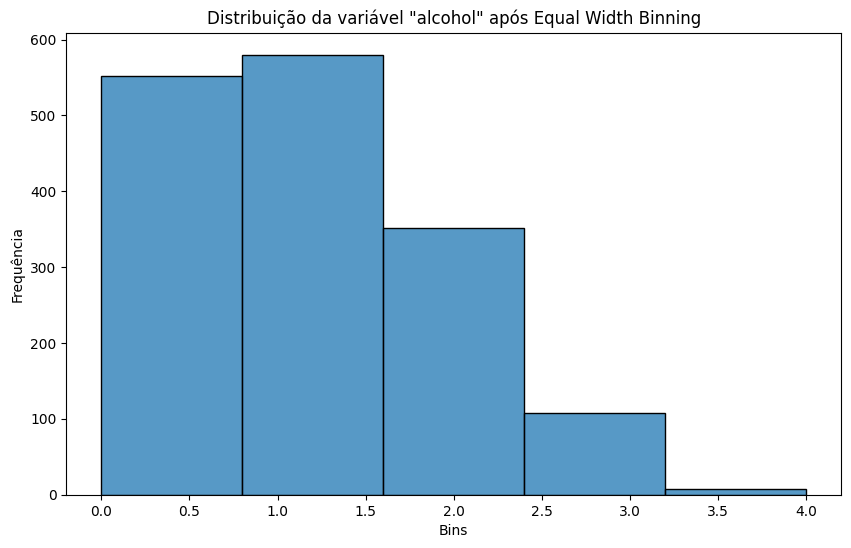

In [24]:
# Plotando a distribuição dos dados discretizados
plt.figure(figsize=(10, 6))
sns.histplot(df['alcohol_equal_width'], bins=5, kde=False)
plt.title('Distribuição da variável "alcohol" após Equal Width Binning')
plt.xlabel('Bins')
plt.ylabel('Frequência')
plt.show()

# 6 Equal Frequency Binning

A técnica de Equal Frequency Binning divide os dados em intervalos com a mesma frequência.

## 6.1 Aplicação de Equal Frequency Binning

In [25]:
# Vamos discretizar a variável 'alcohol' em 5 bins de frequência igual.
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
df['alcohol_equal_frequency'] = est.fit_transform(df[['alcohol']])

## 6.2 Visualização dos resultados

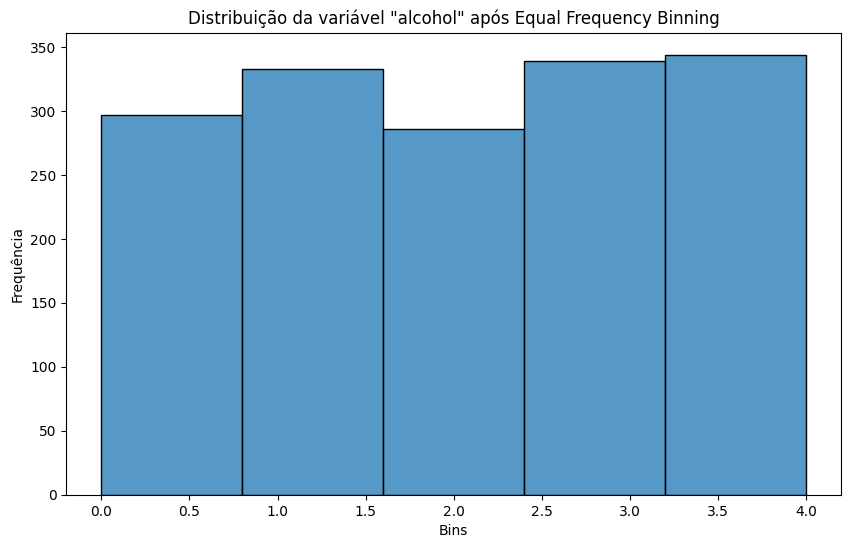

In [26]:
# Plotando a distribuição dos dados discretizados
plt.figure(figsize=(10, 6))
sns.histplot(df['alcohol_equal_frequency'], bins=5, kde=False)
plt.title('Distribuição da variável "alcohol" após Equal Frequency Binning')
plt.xlabel('Bins')
plt.ylabel('Frequência')
plt.show()

# 7 K-Means Clustering

A técnica de K-Means Clustering agrupa os dados em K clusters.

## 7.1 Aplicação de K-Means Clustering

In [27]:
# Vamos discretizar a variável 'alcohol' em 5 clusters.
kmeans = KMeans(n_clusters=5, random_state=0)
df['alcohol_kmeans'] = kmeans.fit_predict(df[['alcohol']])

## 7.2 Visualização dos resultados

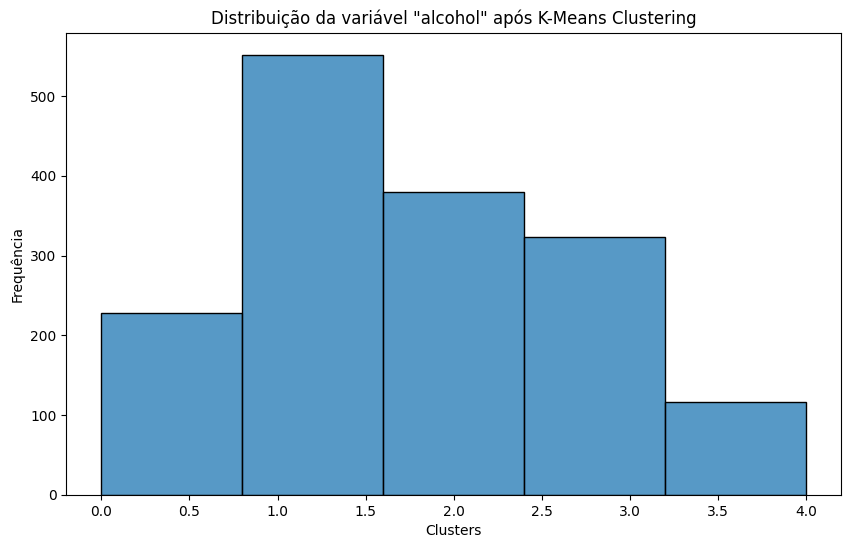

In [28]:
# Plotando a distribuição dos dados discretizados
plt.figure(figsize=(10, 6))
sns.histplot(df['alcohol_kmeans'], bins=5, kde=False)
plt.title('Distribuição da variável "alcohol" após K-Means Clustering')
plt.xlabel('Clusters')
plt.ylabel('Frequência')
plt.show()

# 8 Exemplo de Machine Learning

## 8.1 Preparação dos dados

In [29]:
# Função para treinar o modelo e retornar métricas de desempenho
def train_and_evaluate(X_train, X_test, y_train, y_test):
    """
    Treina um modelo de regressão linear e avalia seu desempenho.

    Parâmetros:
    X_train (pd.DataFrame): Dados de treino (características).
    X_test (pd.DataFrame): Dados de teste (características).
    y_train (pd.Series): Valores de treino (target).
    y_test (pd.Series): Valores de teste (target).

    Retorna:
    dict: Métricas de desempenho (MSE e R²).
    """
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return {'mse': mse, 'r2': r2}

In [30]:
# Dataset não tratado com Equal Width
X_raw = df.drop(columns=['quality', 'alcohol_equal_width', 'alcohol_equal_frequency', 'alcohol_kmeans'])

# Dataset tratado com Equal Width Binning
X_equal_width = df.drop(columns=['quality', 'alcohol', 'alcohol_equal_frequency', 'alcohol_kmeans'])
X_equal_width = X_equal_width.rename(columns={'alcohol_equal_width': 'alcohol'})

# Dataset tratado com Equal Frequency Binning
X_equal_frequency = df.drop(columns=['quality', 'alcohol', 'alcohol_equal_width', 'alcohol_kmeans'])
X_equal_frequency = X_equal_frequency.rename(columns={'alcohol_equal_frequency': 'alcohol'})

# Dataset tratado com K-Means Clustering
X_kmeans = df.drop(columns=['quality', 'alcohol', 'alcohol_equal_width', 'alcohol_equal_frequency'])
X_kmeans = X_kmeans.rename(columns={'alcohol_kmeans': 'alcohol'})

y = df['quality']

## 8.2 Divisão em treino e teste

In [32]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw, y, test_size=0.3, random_state=0)
X_train_equal_width, X_test_equal_width, _, _ = train_test_split(X_equal_width, y, test_size=0.3, random_state=0)
X_train_equal_frequency, X_test_equal_frequency, _, _ = train_test_split(X_equal_frequency, y, test_size=0.3, random_state=0)
X_train_kmeans, X_test_kmeans, _, _ = train_test_split(X_kmeans, y, test_size=0.3, random_state=0)

## 8.3 Treinamento e Avaliação

In [33]:
results_raw = train_and_evaluate(X_train_raw, X_test_raw, y_train, y_test)
results_equal_width = train_and_evaluate(X_train_equal_width, X_test_equal_width, y_train, y_test)
results_equal_frequency = train_and_evaluate(X_train_equal_frequency, X_test_equal_frequency, y_train, y_test)
results_kmeans = train_and_evaluate(X_train_kmeans, X_test_kmeans, y_train, y_test)

print(f"Desempenho com dados brutos: MSE = {results_raw['mse']}, R2 = {results_raw['r2']}")
print(f"Desempenho com Equal Width Binning: MSE = {results_equal_width['mse']}, R2 = {results_equal_width['r2']}")
print(f"Desempenho com Equal Frequency Binning: MSE = {results_equal_frequency['mse']}, R2 = {results_equal_frequency['r2']}")
print(f"Desempenho com K-Means Clustering: MSE = {results_kmeans['mse']}, R2 = {results_kmeans['r2']}")

Desempenho com dados brutos: MSE = 0.4007803663750057, R2 = 0.3207112434321937
Desempenho com Equal Width Binning: MSE = 0.4044768024848243, R2 = 0.3144460974833486
Desempenho com Equal Frequency Binning: MSE = 0.40593924942574294, R2 = 0.311967373854673
Desempenho com K-Means Clustering: MSE = 0.42999088366777427, R2 = 0.2712018920885182


## 8.4 Visualização dos Resultados

Text(0.5, 1.0, 'K-Means Clustering')

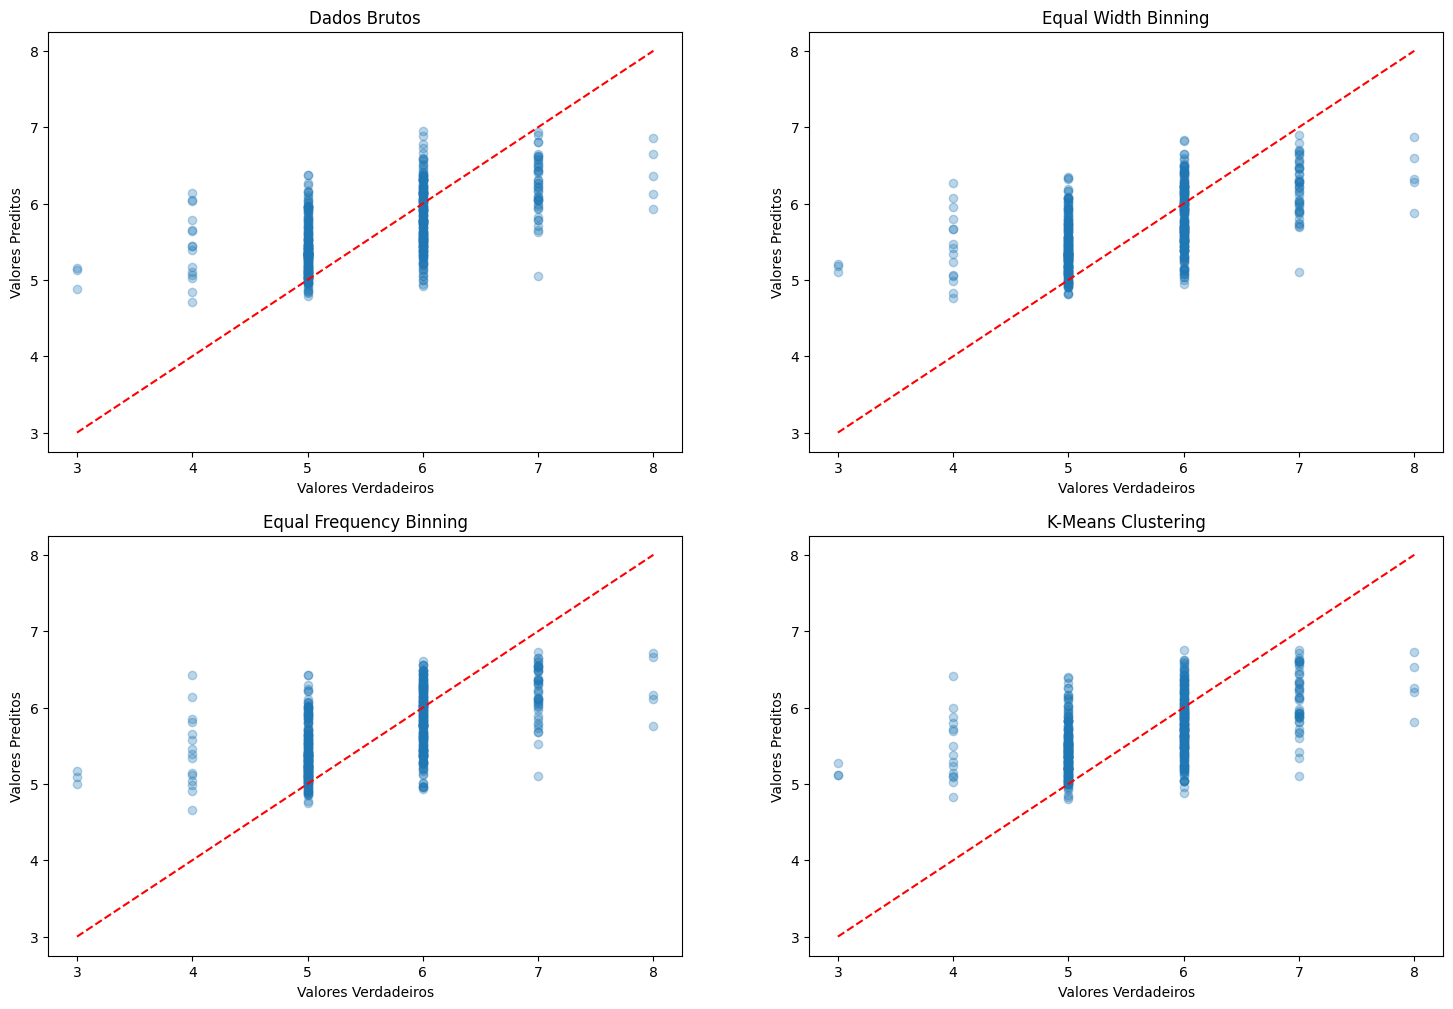

In [35]:
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
plt.scatter(y_test, LinearRegression().fit(X_train_raw, y_train).predict(X_test_raw), alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Valores Verdadeiros')
plt.ylabel('Valores Preditos')
plt.title('Dados Brutos')

plt.subplot(2, 2, 2)
plt.scatter(y_test, LinearRegression().fit(X_train_equal_width, y_train).predict(X_test_equal_width), alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Valores Verdadeiros')
plt.ylabel('Valores Preditos')
plt.title('Equal Width Binning')

plt.subplot(2, 2, 3)
plt.scatter(y_test, LinearRegression().fit(X_train_equal_frequency, y_train).predict(X_test_equal_frequency), alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Valores Verdadeiros')
plt.ylabel('Valores Preditos')
plt.title('Equal Frequency Binning')

plt.subplot(2, 2, 4)
plt.scatter(y_test, LinearRegression().fit(X_train_kmeans, y_train).predict(X_test_kmeans), alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Valores Verdadeiros')
plt.ylabel('Valores Preditos')
plt.title('K-Means Clustering')